In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv('Data\\Cars_price.csv',index_col=0)
df.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [3]:
print(f'dtypes:\n{df.dtypes}')
print('_'*15)
print(f'Stats:\n {df.describe()}')
print('_'*15)
print(f'Correlation:\n {df.corr()}')
print('_'*15)
print(f'Null values:\n{df.isnull().sum()}')
print('_'*15)
print(f'Duplicated values: {df.duplicated().sum()}')
print('_'*15)
print(f'Shape: {df.shape}')

dtypes:
Company Name           object
Model Name             object
Price                   int64
Model Year              int64
Location               object
Mileage                 int64
Engine Type            object
Engine Capacity         int64
Color                  object
Assembly               object
Body Type              object
Transmission Type      object
Registration Status    object
dtype: object
_______________
Stats:
               Price    Model Year        Mileage  Engine Capacity
count  4.602200e+04  46022.000000   46022.000000     46022.000000
mean   2.014153e+06   2011.035374   90965.128243      1313.115575
std    2.939071e+06      6.399403   63656.656034       614.690832
min    1.110000e+05   1990.000000       1.000000        16.000000
25%    8.500000e+05   2007.000000   48899.500000      1000.000000
50%    1.450000e+06   2013.000000   80000.000000      1300.000000
75%    2.300000e+06   2016.000000  120000.000000      1500.000000
max    7.750000e+07   2019.000000  9

C:\Users\huber\AppData\Local\Temp\ipykernel_30812\279329912.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f'Correlation:\n {df.corr()}')


In [4]:
df.drop_duplicates()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46018,Honda,Vezel,3400000,2015,Punjab,32000,Petrol,1500,Black,Imported,Cross Over,Automatic,Un-Registered
46019,Toyota,Aqua,2450000,2015,Punjab,52000,Petrol,1500,Blue,Imported,Hatchback,Automatic,Un-Registered
46020,Honda,Civic,3250000,2015,Punjab,125000,Petrol,1800,Black,Local,Sedan,Automatic,Registered
46021,Toyota,Aqua,3000000,2016,Punjab,60000,Petrol,1500,Black,Imported,Hatchback,Automatic,Registered


EDA

In [5]:
cat_cols = list(df.select_dtypes('object'))
df[cat_cols].nunique()

Company Name            31
Model Name             196
Location                 6
Engine Type              3
Color                   24
Assembly                 2
Body Type                6
Transmission Type        2
Registration Status      2
dtype: int64

In [6]:
num_cols = list(df.select_dtypes('int'))

Text(0.5, 0.92, 'Count of categorical columns')

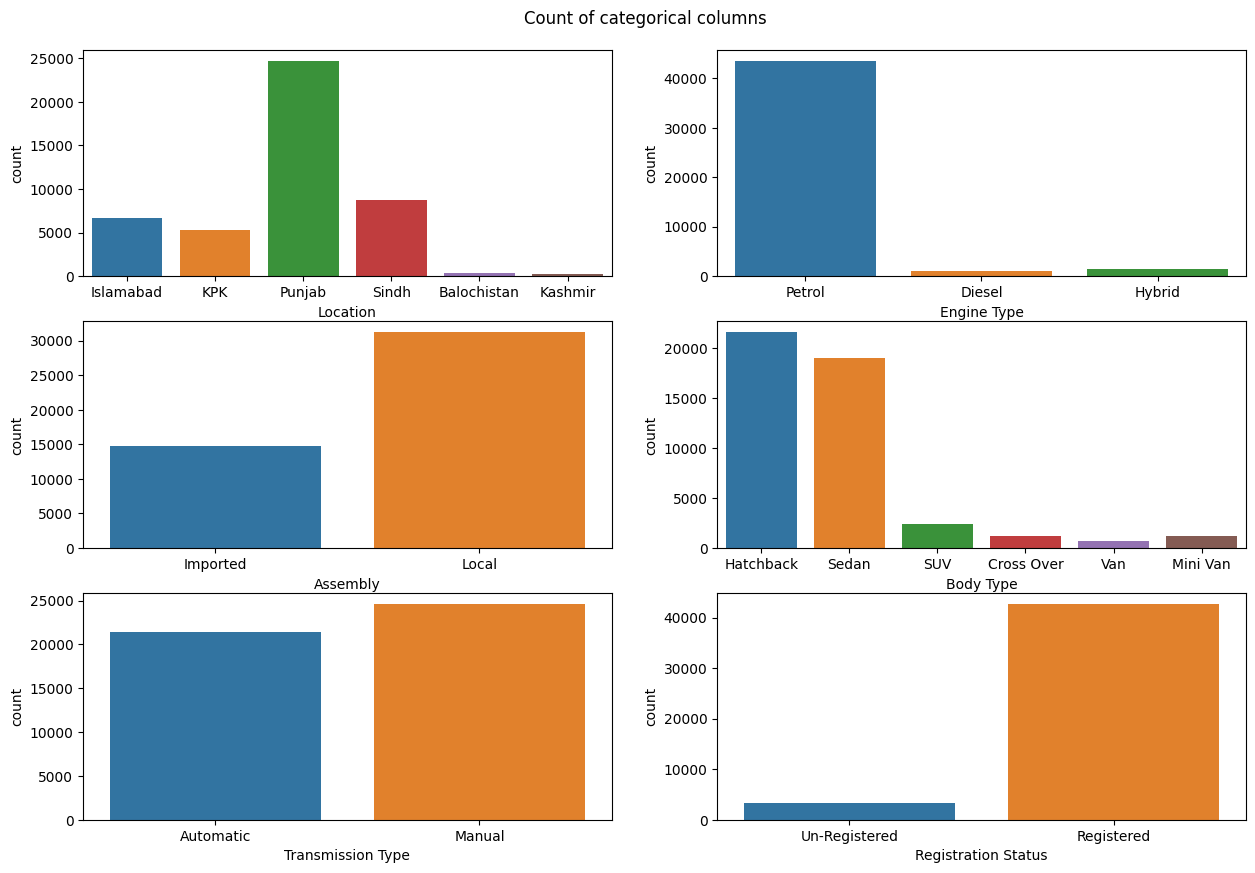

In [7]:
count_cols = ['Location','Engine Type','Assembly','Body Type','Transmission Type','Registration Status']
fig, ax = plt.subplots(3,2,figsize=(15,10))
ax = ax.flat

for i,col in enumerate(count_cols):
    sns.countplot(df,x=col,ax=ax[i])

plt.suptitle('Count of categorical columns',y=0.92)


Text(0.5, 0.92, 'Count of categorical columns')

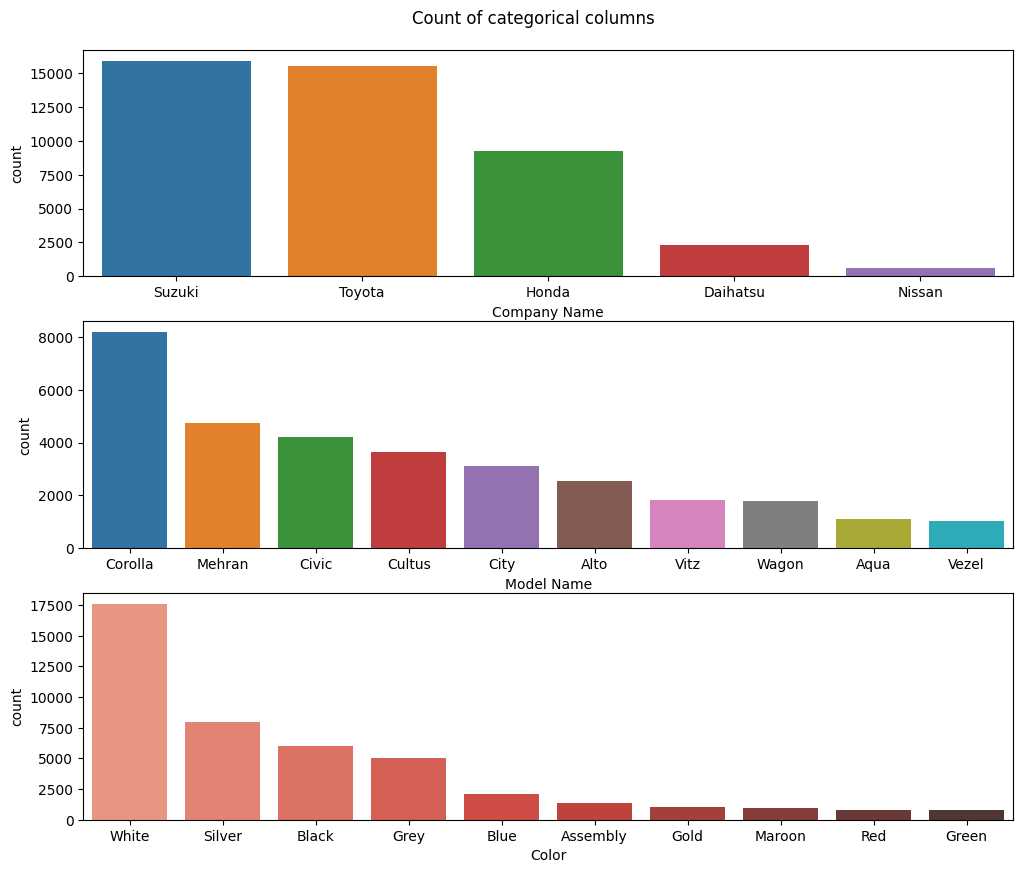

In [8]:
fig, ax = plt.subplots(3,1,figsize=(12,10))

sns.countplot(df,x=df['Company Name'], ax = ax[0], order = df['Company Name'].value_counts().iloc[:5].index)
sns.countplot(df,x=df['Model Name'], ax = ax[1], order = df['Model Name'].value_counts().iloc[:10].index)
sns.countplot(df,x=df['Color'], ax = ax[2], order = df['Color'].value_counts().iloc[:10].index,palette='Reds_d')

plt.suptitle('Count of categorical columns',y=0.92)

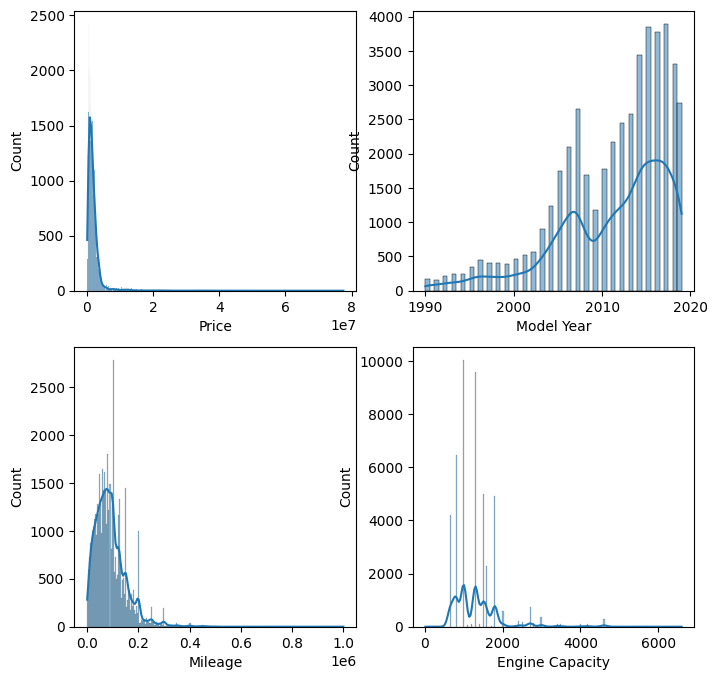

In [9]:
fig,ax = plt.subplots(2,2,figsize=(8,8))
ax = ax.flat

for i,col in enumerate(num_cols):
    sns.histplot(df,x=col,ax=ax[i],kde=True)

<AxesSubplot: xlabel='Engine Capacity', ylabel='Price'>

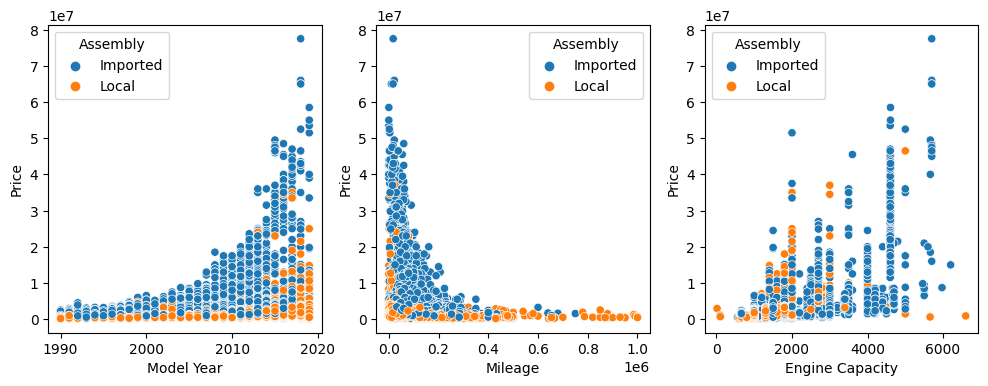

In [10]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
ax = ax.flat

sns.scatterplot(df,y='Price',x='Model Year',ax=ax[0],hue='Assembly')
sns.scatterplot(df,y='Price',x='Mileage',ax=ax[1],hue='Assembly')
sns.scatterplot(df,y='Price',x='Engine Capacity',ax=ax[2],hue='Assembly')


In [11]:
cat_cols

['Company Name',
 'Model Name',
 'Location',
 'Engine Type',
 'Color',
 'Assembly',
 'Body Type',
 'Transmission Type',
 'Registration Status']

In [12]:
hp = df[['Company Name','Model Name','Price','Mileage','Engine Capacity']].sort_values('Price',ascending=False)[:10]
hp.style.background_gradient(cmap='Reds')

,Company Name,Model Name,Price,Mileage,Engine Capacity
20155,Lexus,LX,77500000,17500,5700
41014,Lexus,LX,66000000,22000,5700
43074,Lexus,LX,65000000,17000,5700
42077,Lexus,LX,65000000,10000,5700
13045,Toyota,Land,58500000,84,4608
44448,Toyota,Land,55000000,25,4608
36666,Toyota,Land,53500000,300,4600
44007,Range,Rover,52500000,2000,5000
20029,Range,Rover,51500000,4000,2000
37213,Lexus,LX,49500000,22000,5663


In [13]:
lp = df[['Company Name','Model Name','Price','Mileage','Engine Capacity']].sort_values('Price',ascending=True)[:10]
lp.style.background_gradient(cmap='Greens_r')

,Company Name,Model Name,Price,Mileage,Engine Capacity
1,Toyota,Corolla,111000,11111,1300
3215,Suzuki,FX,120000,150000,800
2338,Toyota,Corolla,123000,123456,1300
34211,Suzuki,Mehran,130000,120000,800
31874,KIA,Pride,135000,100000,1100
16607,Daewoo,Racer,140000,100000,1300
44215,Suzuki,Mehran,140000,100000,800
39539,Suzuki,Khyber,145000,120000,1000
39540,Suzuki,Khyber,145000,300000,1000
12304,Daewoo,Racer,150000,100000,1500


In [14]:
 df[cat_cols].nunique()

Company Name            31
Model Name             196
Location                 6
Engine Type              3
Color                   24
Assembly                 2
Body Type                6
Transmission Type        2
Registration Status      2
dtype: int64

In [15]:
com = df.groupby('Company Name')['Price'].mean().sort_values(ascending=False)[:10]
mdl = df.groupby('Model Name')['Price'].mean().sort_values(ascending=False)[:10]
clr = df.groupby('Color')['Price'].mean().sort_values(ascending=False)[:10]
lct = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
eng = df.groupby('Engine Type')['Price'].mean().sort_values(ascending=False)
bod = df.groupby('Body Type')['Price'].mean().sort_values(ascending=False)
asb = df.groupby('Assembly')['Price'].mean().sort_values(ascending=False)
trs = df.groupby('Transmission Type')['Price'].mean().sort_values(ascending=False)
res = df.groupby('Registration Status')['Price'].mean().sort_values(ascending=False)

Text(0.5, 0.93, 'Mean price by category')

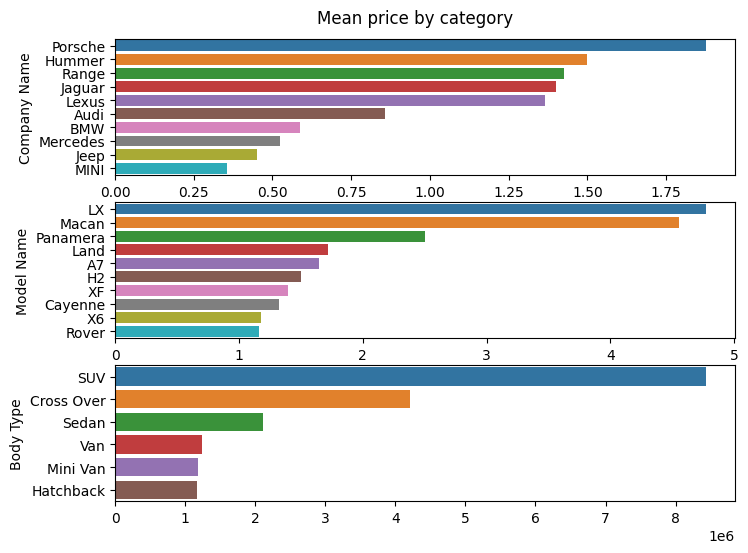

In [16]:
fig,ax= plt.subplots(3,1,figsize=(8,6))


sns.barplot(df,y=com.index, x=com.values,ax=ax[0])
sns.barplot(df,y=mdl.index, x=mdl.values,ax=ax[1])
sns.barplot(df,y=bod.index, x=bod.values,ax=ax[2])

plt.suptitle('Mean price by category',y=0.93)

<AxesSubplot: ylabel='Color'>

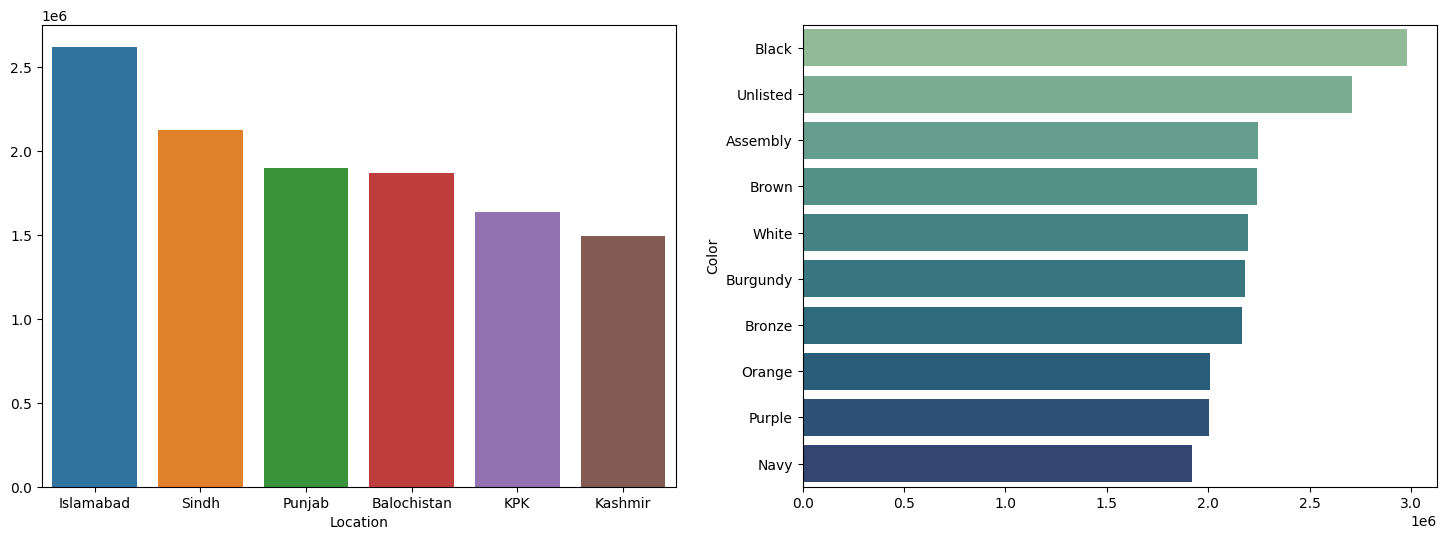

In [17]:
fig,ax= plt.subplots(1,2,figsize=(18,6))


sns.barplot(df,x=lct.index, y=lct.values,ax=ax[0])
sns.barplot(df,y=clr.index, x=clr.values,palette = 'crest')


<AxesSubplot: xlabel='Transmission Type'>

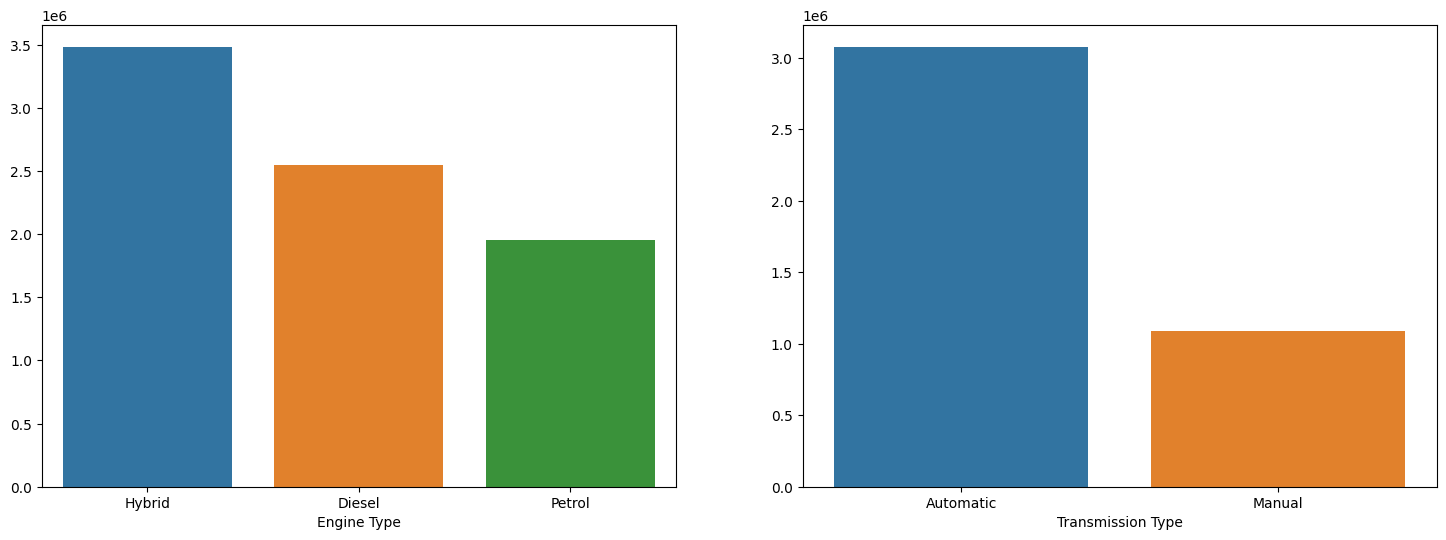

In [18]:
fig,ax= plt.subplots(1,2,figsize=(18,6))


sns.barplot(df,x=eng.index, y=eng.values,ax=ax[0])
sns.barplot(df,x=trs.index, y=trs.values,ax=ax[1])


<AxesSubplot: xlabel='Assembly'>

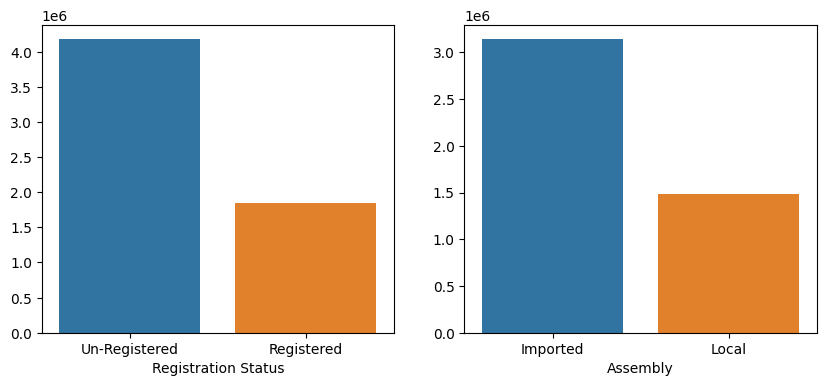

In [19]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.barplot(df,x=res.index, y=res.values,ax=ax[0])
sns.barplot(df,x=asb.index, y=asb.values,ax=ax[1])

C:\Users\huber\AppData\Local\Temp\ipykernel_30812\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

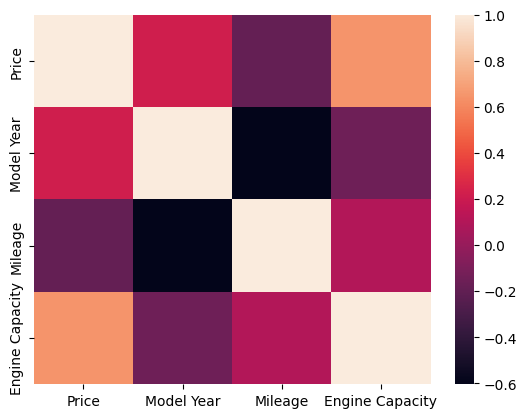

In [20]:
sns.heatmap(df.corr())

ML

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet



In [22]:
X = df.drop('Price',axis=1)

In [23]:
y = df['Price']

In [24]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=0)

In [26]:
X_train.shape, X_valid.shape,y_train.shape

((33135, 12), (8284, 12), (33135,))

In [27]:
num_cols, cat_cols

(['Price', 'Model Year', 'Mileage', 'Engine Capacity'],
 ['Company Name',
  'Model Name',
  'Location',
  'Engine Type',
  'Color',
  'Assembly',
  'Body Type',
  'Transmission Type',
  'Registration Status'])

In [28]:
num_cols.remove('Price')

Linear Regression

In [29]:
t = [('num_cols', StandardScaler(), num_cols),
    ('cat_cols', OneHotEncoder(handle_unknown='ignore'), cat_cols)]
processor = ColumnTransformer(t)

In [30]:
pipe_lin = Pipeline([('processor', processor), 
                ('model', LinearRegression())])

In [31]:
pipe_lin.fit(X_train, y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  ['Model Year', 'Mileage',
                                                   'Engine Capacity']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company Name', 'Model Name',
                                                   'Location', 'Engine Type',
                                                   'Color', 'Assembly',
                                                   'Body Type',
                                                   'Transmission Type',
                                                   'Registration Status'])])),
                ('model', LinearRegression())])

In [32]:
lin_pred = pipe_lin.predict(X_valid)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
MAE_lin = mean_absolute_error(y_valid,lin_pred)
MSE_lin = np.sqrt(mean_squared_error(y_valid,lin_pred))
SCR_lin = pipe_lin.score(X_valid,y_valid)

In [35]:
print(f'MAE:{np.round(MAE_lin,2)}')
print(f'MSE:{np.round(MSE_lin,2)}')
print(f'Score:{np.round(SCR_lin,4)}')

MAE:569590.01
MSE:1490454.64
Score:0.7506


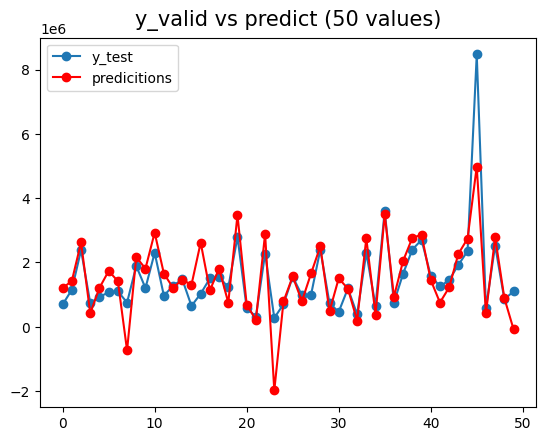

In [36]:
plt.plot(np.array(y_valid)[-50:],marker='o',label='y_test')
plt.plot((lin_pred)[-50:],marker='o',label='predicitions',color='red')
plt.title('y_valid vs predict (50 values)', size=15, y=1.01)
plt.legend()

XGBoost

In [37]:
pipe_xgb = Pipeline([('processor', processor), 
                ('model', XGBRegressor())])

In [38]:
pipe_xgb.fit(X_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  ['Model Year', 'Mileage',
                                                   'Engine Capacity']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company Name', 'Model Name',
                                                   'Location', 'Engine Type',
                                                   'Color', 'Assembly',
                                                   'Body Type',
                                                   'Transmission Type',
                                                   'Registration Status'])])),
                ('model',
                 XGBRegressor(base_score=None, boo...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [39]:
xgb_pred = pipe_xgb.predict(X_valid)

In [40]:
MAE_xgb = mean_absolute_error(y_valid,xgb_pred)
MSE_xgb = np.sqrt(mean_squared_error(y_valid,xgb_pred))
SCR_xgb = pipe_xgb.score(X_valid,y_valid)

In [41]:
print(f'MAE:{np.round(MAE_xgb,2)}')
print(f'MSE:{np.round(MSE_xgb,2)}')
print(f'Score:{np.round(SCR_xgb,4)}')

MAE:173964.78
MSE:488020.27
Score:0.9733


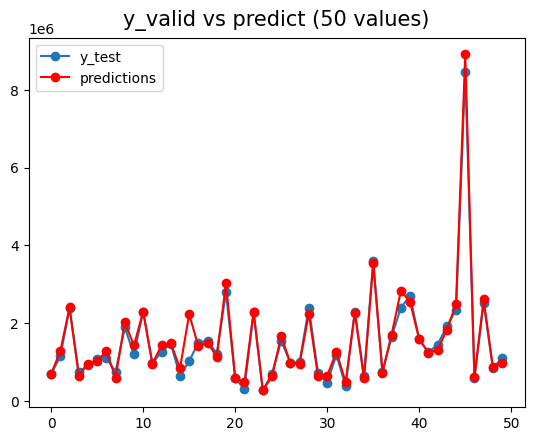

In [42]:
plt.plot(np.array(y_valid)[-50:],marker='o',label='y_test')
plt.plot((xgb_pred)[-50:],marker='o',label='predictions',color='red')
plt.title('y_valid vs predict (50 values)', size=15, y=1.01)
plt.legend()

LGBM

In [43]:
from lightgbm import LGBMRegressor

In [44]:
pipe_lgbm = Pipeline([('processor', processor), 
                ('model', LGBMRegressor())])


In [45]:
pipe_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629
[LightGBM] [Info] Number of data points in the train set: 33135, number of used features: 151
[LightGBM] [Info] Start training from score 2010550.475328


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  ['Model Year', 'Mileage',
                                                   'Engine Capacity']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company Name', 'Model Name',
                                                   'Location', 'Engine Type',
                                                   'Color', 'Assembly',
                                                   'Body Type',
                                                   'Transmission Type',
                                                   'Registration Status'])])),
                ('model', LGBMRegressor())])

In [46]:
preds = pipe_lgbm.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, preds))

529269.9620078539

In [48]:
(mean_absolute_error(y_test, preds))

191428.11271922107

ElasticNet

In [49]:
pipe_eln = Pipeline([('processor', processor), 
                ('model', ElasticNet())])

In [50]:
pipe_eln.fit(X_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num_cols', StandardScaler(),
                                                  ['Model Year', 'Mileage',
                                                   'Engine Capacity']),
                                                 ('cat_cols',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company Name', 'Model Name',
                                                   'Location', 'Engine Type',
                                                   'Color', 'Assembly',
                                                   'Body Type',
                                                   'Transmission Type',
                                                   'Registration Status'])])),
                ('model', ElasticNet())])

In [51]:
eln_pred = pipe_eln.predict(X_valid)

In [52]:
MAE_eln = mean_absolute_error(y_valid,eln_pred)
MSE_eln = np.sqrt(mean_squared_error(y_valid,eln_pred))
SCR_eln = pipe_eln.score(X_valid,y_valid)

In [53]:
print(f'MAE:{np.round(MAE_eln,2)}')
print(f'MSE:{np.round(MSE_eln,2)}')
print(f'Score:{np.round(SCR_eln,4)}')

MAE:641723.62
MSE:2120904.05
Score:0.495


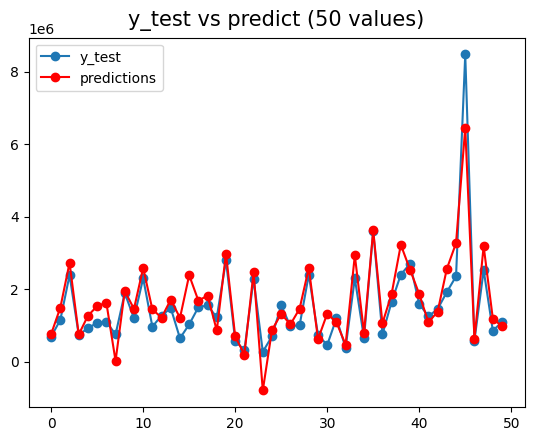

In [54]:
plt.plot(np.array(y_valid)[-50:],marker='o',label='y_test')
plt.plot((eln_pred)[-50:],marker='o',label='predictions',color='red')
plt.title('y_test vs predict (50 values)', size=15, y=1.01)
plt.legend()

Text(0.5, 0.93, 'MAE & MSE Comparision')

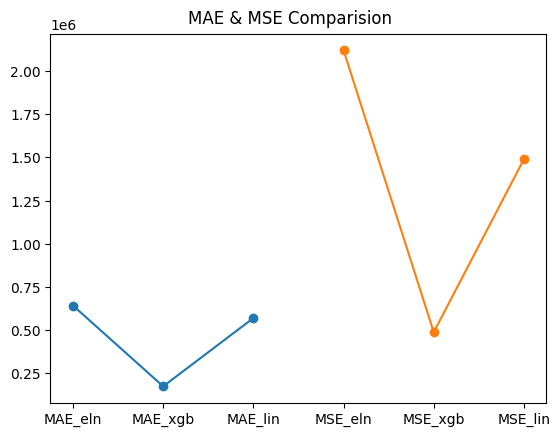

In [55]:
MSE_ = [MSE_eln, MSE_xgb, MSE_lin]
MAE_ = [MAE_eln, MAE_xgb, MAE_lin]

MAE = pd.DataFrame(data=MAE_,index=['MAE_eln', 'MAE_xgb', 'MAE_lin'])
MSE = pd.DataFrame(data=MSE_, index=['MSE_eln', 'MSE_xgb', 'MSE_lin'])

plt.plot(MAE,marker='o',label = 'MAE')
plt.plot(MSE,marker='o',label = 'MSE')
plt.suptitle('MAE & MSE Comparision',y=0.93)

#XGB is best model for this data set

Params tuning


In [56]:
#Best MAE and MSE was on 2 models XGB and LGBM - both params are quite fast so I will perform Gsearch on both 
#From my experience LGB is working better on data sets>10k rows, I'm using XGB more as a benchamark then final model, but this time it performed the best

In [57]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
from sklearn.metrics import mean_squared_error

In [61]:
def objective(params):
    
    params = {'num_leaves': int(params['num_leaves']),
              'learning_rate': params['learning_rate'],
              'max_depth': int(params['max_depth']),
              #'n_estimators': int(params['n_estimators']),
              'num_iterations': int(params['num_iterations'])
              }
    
    
    model = Pipeline([('processor', processor), 
                ('model', LGBMRegressor(**params,n_estimators = 1500))])

    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds)) 
    
    return {'loss':rmse, 'status':STATUS_OK}

In [62]:
space = {#'n_estimators': hp.quniform('n_estimators', 1000, 3000,100),
         'num_leaves': hp.quniform('num_leaves', 8, 128, 8),
         'learning_rate': hp.quniform('learning_rate', 0.01, 0.1, 0.01),
         'max_depth': hp.quniform('max_depth', 4, 9,1),
         'num_iterations': hp.quniform('num_iterations', 100, 5000, 100,)
         }

In [ ]:
best  = fmin(
    fn = objective,
    space = space,
    algo = tpe.suggest,
    max_evals = 50,
    trials = Trials()
)

best

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 629                                                 
[LightGBM] [Info] Number of data points in the train set: 33135, number of used features: 151
[LightGBM] [Info] Start training from score 2010550.475328                       
  0%|                                     | 0/50 [00:00<?, ?trial/s, best loss=?]

C:\Users\huber\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

C:\Users\huber\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf       
[LightGBM] [Warn

In [ ]:
# from hyperopt import fmin, tpe, hp, anneal, Trials, STATUS_OK
# from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# space={'n_estimators': hp.quniform('n_estimators', 100, 2000, 100),
#        'gamma': hp.uniform ('gamma', 1,9),
#        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
#        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
#        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
#        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
#        'max_depth' : hp.quniform('max_depth', 2, 20, 1),
# #        'booster': hp.choice('booster',['gbtree', 'gblinear']),
# #        'learning_rate': hp.quniform('learning_rate', .001, 0.2, .001)}

# space = {'learning_rate': hp.quniform('learning_rate', .001, 0.1, .001),
#          'gamma': hp.uniform('gamma', 0, 10),
#          'max_depth': hp.quniform('max_depth', 1, 20, 1),
#          'subsample': hp.choice('subsample', [0.5, 1]),
#          'reg_lambda':hp.uniform('reg_labda', 0,200),#TEST
#          'reg_alpha':hp.uniform('reg_alpha', 0,200)#TEST - normalnie do 1 
#         }
         

In [ ]:
# #Do wyjebania - to są dla klasyfikacji
# def objective(space):
#     model = Pipeline([('processor', processor), 
#                 ('model', XGBRegressor(n_estimators = 1000, max_depth = int(space['max_depth']),
#                                       gamma = space['gamma'],
#                                       reg_alpha = int(space['reg_alpha']),
#                                       reg_lambda = space['reg_lambda'],
#                                       learning_rate = space['learning_rate']))])
    
#     score = -cross_val_score(model, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error').mean()
#     return{'loss':score, 'status':STATUS_OK}

In [ ]:
# trials = Trials()
# best = fmin(fn=objective,
#             space = space,
#             algo = tpe.suggest,
#             max_evals = 50,
#             trials = trials)


# best

In [ ]:
# 426467633899.6549

In [ ]:
# final_model = XGBRegressor(n_estimators = 2000,
#                                       max_depth = 8,
#                                       gamma = 5.387,
#                                       reg_alpha = 160.0,
#                                       min_child_weight = 3.0,
#                                       reg_lambda = 0.8872366561766475,
#                                       colsample_bytree = 0.7641524831619938, 
#                                       learning_rate = 0.083)

In [ ]:
# final_model = Pipeline([('processor', processor), 
#                 ('model', final_model)])
# final_model.fit(X_train, y_train)

In [ ]:
# preds = final_model.predict(X_test)

In [ ]:
# mean_absolute_error(y_test, preds),


In [ ]:
# np.sqrt(mean_squared_error(y_test, preds))

In [ ]:
#Final model params are slightly worse on the test data, but cross validation score is more important, so this model will be more accurate on real data